In [67]:
%matplotlib notebook
from Ellipse import *
from MCE import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import matplotlib.cm as cm

In [68]:
E1 = Ellipse(2, 1.3, 0, 0)
E2 = Ellipse(2, 1.3, 0.7, 0.7)

xs = [-0.1, 1, 2]
ys = [0, 1.4, 0]
n=3

In [111]:
def setop(ax):
    ax.set_aspect('equal')
    ax.set_xlim(-4, 5)
    ax.set_ylim(-3, 3)

def ppoints(ax=None):
    if ax is None:
        ax=plt.gca()
    setop(ax)
    ax.scatter(xs, ys, s=30)

    
def pell_from_points(ax=None):
    if ax is None:
        ax=plt.gca()
    setop(ax)
    E=[mp.patches.Ellipse([xs[i], ys[i]], E1.a * 2, E1.b * 2, fill=False) for i in range(n)]
    for e in E:
        ax.add_artist(e)

def pell_mce1(ax=None):
    if ax is None:
        ax=plt.gca()
    setop(ax)
    zs = MCE1(xs, ys, E1)
    colors=cm.Reds(np.linspace(0.5, 1, 4))
    
    print(colors)
    
    for z in zs:
        ax.add_artist(mp.patches.Ellipse([z.p.x, z.p.y], E1.a * 2, E1.b * 2, fill=False, color=colors[len(z.cov)-1]))

<IPython.core.display.Javascript object>


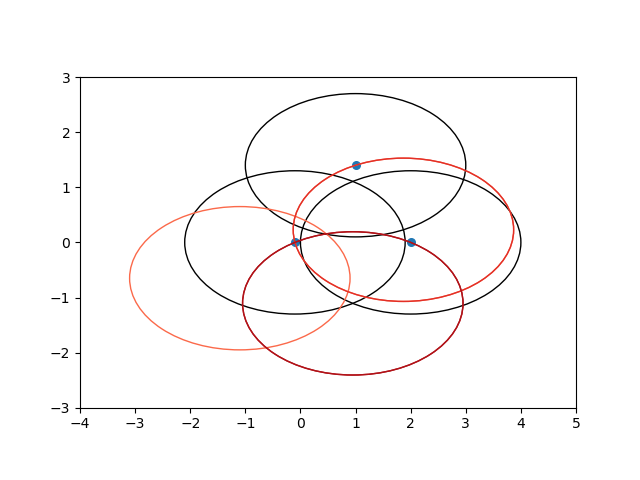

In [112]:
plt.figure(1)
ax1=plt.gca()
ppoints(ax1)

plt.show()

In [113]:
pell_from_points(ax1)
plt.show()

In [114]:
pell_mce1(ax1)
plt.show()

[[0.98357555 0.41279508 0.28835063 1.        ]
 [0.89019608 0.18562092 0.15294118 1.        ]
 [0.69439446 0.0700346  0.09231834 1.        ]
 [0.40392157 0.         0.05098039 1.        ]]


<IPython.core.display.Javascript object>


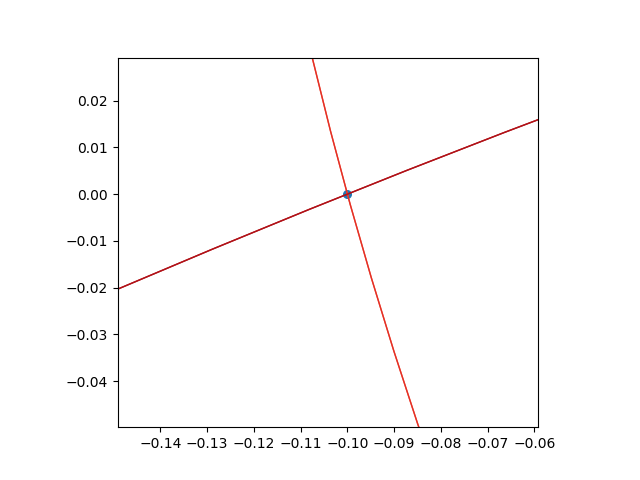

In [110]:
plt.figure(2)
ax2=plt.gca()
pell_mce1(ax2)
ppoints(ax2)
plt.show()